E:\app\conda_new\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


(4096, 4096)


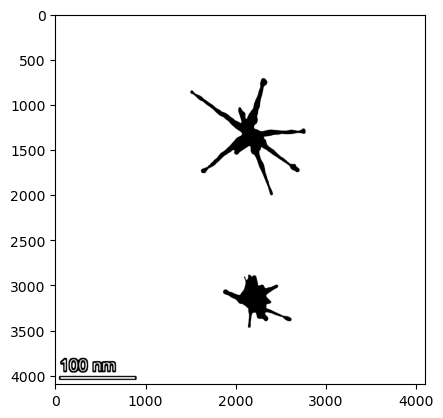

In [1]:
import skimage as ski
import numpy as np
from skimage.util import invert
from skimage.color import rgb2gray
%matplotlib inline
import matplotlib.pyplot as plt
import os
from skimage.morphology import skeletonize, thin
import cv2

filename = 'ATTA_GNS.png'
image = ski.io.imread(filename)
image = rgb2gray(image)
for i in range(50):
    image = ski.filters.gaussian(image)
""" further enhancement an be made with opening and closing the image
background can be worked out suing selective backgrounds (source youtube Nicolai)"""
copied = image.copy()
print(np.shape(copied))
for r in range(4096):
    for i in range(4096):
        a = round(image[r][i],2)
        if a > 0.6:
            copied[r][i]= 1
        else:
            copied[r][i] = 0
plt.imshow(copied, cmap = 'gray')

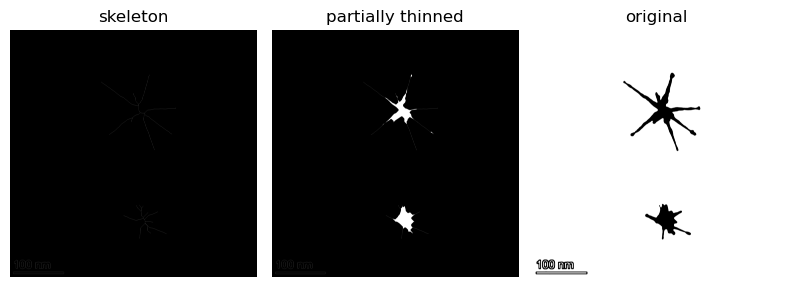

In [2]:
image = invert(copied)
skeleton = skeletonize(image)
''' can be enhanced by opening and closing to get rid of small curves
  the centres can be found by open function only on the core (core is colored differently)'''
thinned_partial = thin(image, max_num_iter=30)

fig, axes = plt.subplots(1,3, figsize=(8, 8), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(skeleton, cmap=plt.cm.gray)
ax[0].set_title('skeleton')
ax[0].axis('off')

ax[1].imshow(thinned_partial, cmap=plt.cm.gray)
ax[1].set_title('partially thinned')
ax[1].axis('off')

ax[2].imshow(invert(image), cmap=plt.cm.gray)
ax[2].set_title('original')
ax[2].axis('off')


fig.tight_layout()
plt.show()

(4096, 4096)


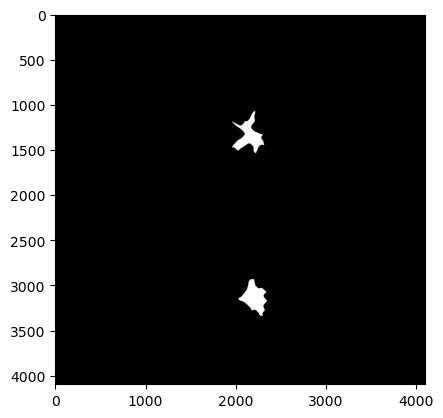

In [6]:
image = thinned_partial.copy()
image = image.astype(np.float32)
for i in range(100):
    image = ski.filters.gaussian(image)
copied = image.copy()
print(np.shape(copied))
for r in range(4096):
    for i in range(4096):
        a = round(image[r][i],2)
        if a > 0.6:
            copied[r][i]= 1
        else:
            copied[r][i] = 0
''' instead of using Gaussian blur and thresholding everything, eroding can be more efficient
 for later dilation '''
thinned_partial = thinned_partial.astype(np.uint8)
cores = cv2.bitwise_and(copied,copied, mask= invert(thinned_partial))
plt.imshow(cores, 'gray')

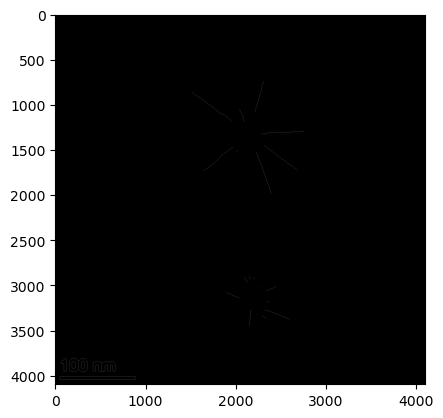

In [8]:
lines = skeleton.copy()
'''
here parallel computation will be more efficient

'''
for r in range(4096):
    for i in range(4096):
        a = skeleton[r][i] - cores[r][i]
        if a > 0:
            lines[r][i]= 1
        else:
            lines[r][i] = 0
plt.imshow(lines,'gray')

In [10]:
image = cores
scaled_image = (image + np.min(image)) / (np.max(image) + np.min(image)) * 255
image_uint8 = scaled_image.astype(np.uint8)
ski.io.imsave('outputh.png', image_uint8)

C:\Users\user\AppData\Local\Temp\ipykernel_12340\2562817217.py:4: UserWarning: outputh.png is a low contrast image
  ski.io.imsave('outputh.png', image_uint8)
